<a href="https://colab.research.google.com/github/villafue/Capstone_1-_Predict_House_Prices/blob/master/Reference%20Notebooks/Saved_Code_Examples_for_Mentor_Calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***BsmtFinSF1***
- Type 1 finished square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtFinSF1'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF1'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtFinSF1", data=train, palette = mycols);

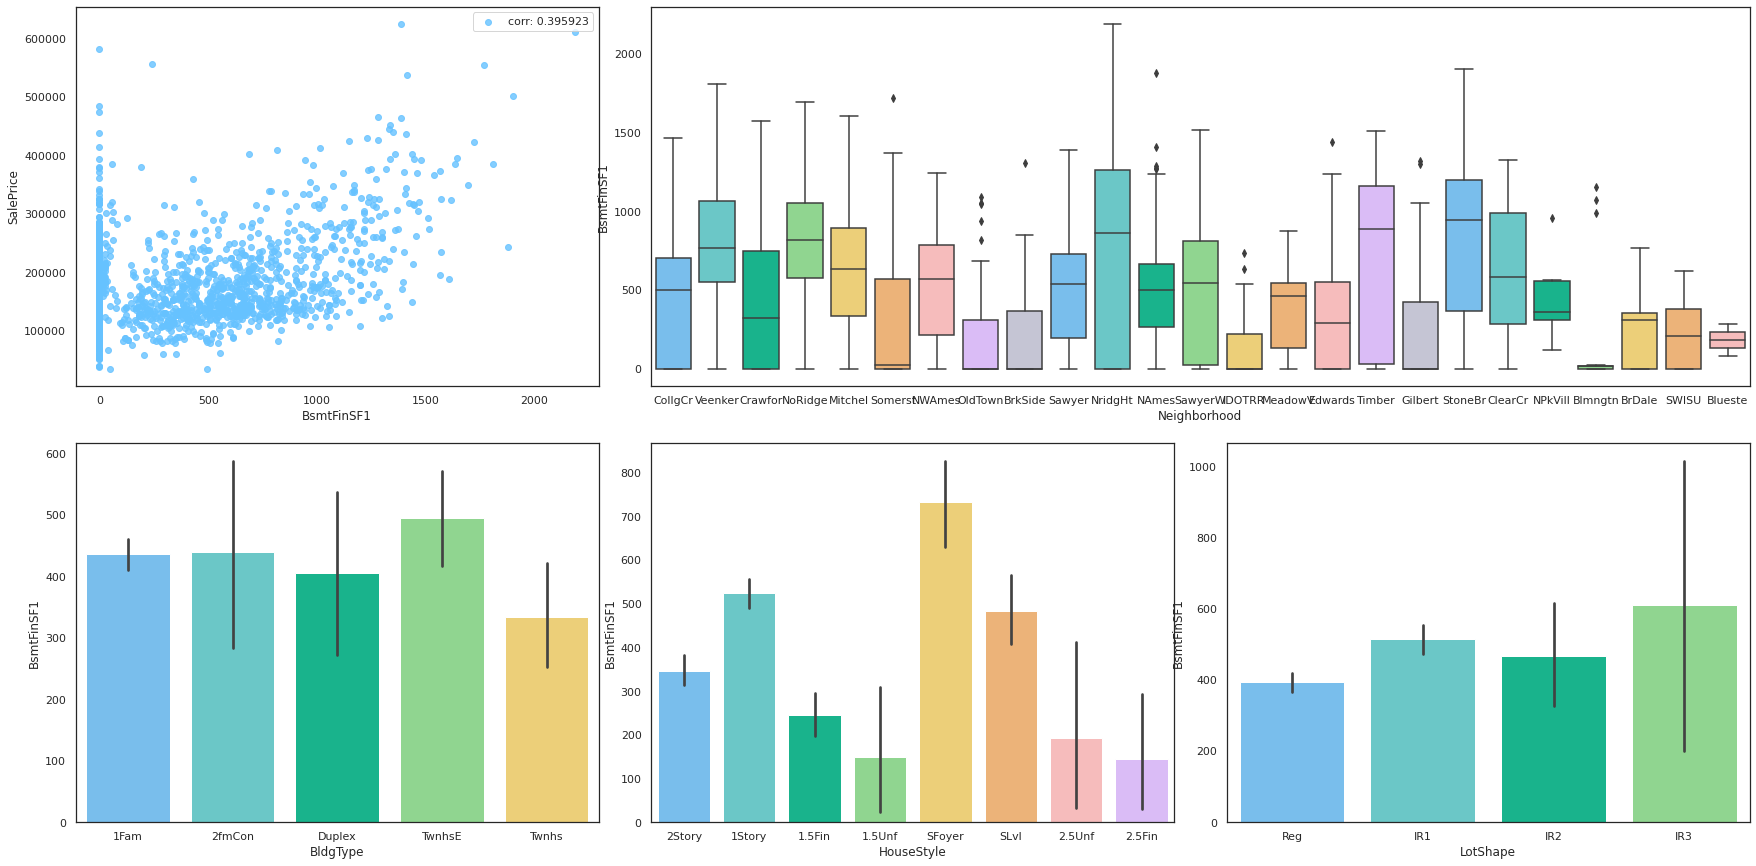

- This feature has a positive correlation with SalePrice and the spread of data points is quite large. 
- It is also clear that the local area (Neighborhood) and style of building (BldgType, HouseStyle and LotShape) has a varying effect on this feature.
- Since this is a continuous numeric feature, I will bin this into several categories and create dummy features.

In [ ]:
all_data['BsmtFinSF1_Band'] = pd.cut(all_data['BsmtFinSF1'], 4)
all_data['BsmtFinSF1_Band'].unique()

In [ ]:
#Output

'''[(-4.01, 1002.5], (1002.5, 2005.0], (2005.0, 3007.5], (3007.5, 4010.0]]
Categories (4, interval[float64]): [(-4.01, 1002.5] < (1002.5, 2005.0] < (2005.0, 3007.5] <
                                    (3007.5, 4010.0]]'''

In [ ]:
all_data.loc[all_data['BsmtFinSF1']<=1002.5, 'BsmtFinSF1'] = 1
all_data.loc[(all_data['BsmtFinSF1']>1002.5) & (all_data['BsmtFinSF1']<=2005), 'BsmtFinSF1'] = 2
all_data.loc[(all_data['BsmtFinSF1']>2005) & (all_data['BsmtFinSF1']<=3007.5), 'BsmtFinSF1'] = 3
all_data.loc[all_data['BsmtFinSF1']>3007.5, 'BsmtFinSF1'] = 4
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].astype(int)

all_data.drop('BsmtFinSF1_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["BsmtFinSF1"], prefix="BsmtFinSF1")
all_data.head(3)

In [ ]:
# Output

'''MSSubClass	MSZoning	LotFrontage	LotArea	Street	Alley	LotShape	LandContour	LotConfig	LandSlope	Neighborhood	Condition1	Condition2	BldgType	HouseStyle	OverallQual	OverallCond	YearBuilt	YearRemodAdd	RoofStyle	RoofMatl	Exterior1st	Exterior2nd	MasVnrType	MasVnrArea	ExterQual	ExterCond	Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType2	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	Heating	HeatingQC	CentralAir	Electrical	1stFlrSF	...	GrLivArea-3	GarageCars-3	GarageArea-3	TotalBsmtSF-3	1stFlrSF-3	FullBath-3	TotRmsAbvGrd-3	Fireplaces-3	MasVnrArea-3	BsmtFinSF1-3	LotFrontage-3	WoodDeckSF-3	OpenPorchSF-3	2ndFlrSF-3	OverallQual-Sq	GrLivArea-Sq	GarageCars-Sq	GarageArea-Sq	TotalBsmtSF-Sq	1stFlrSF-Sq	FullBath-Sq	TotRmsAbvGrd-Sq	Fireplaces-Sq	MasVnrArea-Sq	BsmtFinSF1-Sq	LotFrontage-Sq	WoodDeckSF-Sq	OpenPorchSF-Sq	2ndFlrSF-Sq	BsmtFinType1_ALQ	BsmtFinType1_BLQ	BsmtFinType1_GLQ	BsmtFinType1_LwQ	BsmtFinType1_None	BsmtFinType1_Rec	BsmtFinType1_Unf	BsmtFinSF1_1	BsmtFinSF1_2	BsmtFinSF1_3	BsmtFinSF1_4
0	60	RL	65.0	8450	Pave	None	Reg	Lvl	Inside	Gtl	CollgCr	Norm	Norm	1Fam	2Story	7	5	2003	2003	Gable	CompShg	VinylSd	VinylSd	BrkFace	196.0	Gd	TA	PConc	3	3	1	Unf	0.0	150.0	856.0	GasA	Ex	Y	SBrkr	856	...	5000211000	8.0	164566592.0	6.272220e+08	627222016	8	512	0	7529536.0	351895816.0	274625.0	0	226981	622835864	2.645751	41.352146	1.414214	23.409400	29.257478	29.257478	1.414214	2.828427	0.0	14.000000	26.570661	8.062258	0.000000	7.810250	29.223278	0	0	1	0	0	0	0	1	0	0	0
1	20	RL	80.0	9600	Pave	None	Reg	Lvl	FR2	Gtl	Veenker	Feedr	Norm	1Fam	1Story	6	8	1976	1976	Gable	CompShg	MetalSd	MetalSd	None	0.0	TA	TA	CBlock	3	3	4	Unf	0.0	284.0	1262.0	GasA	Ex	Y	SBrkr	1262	...	2009916728	8.0	97336000.0	2.009917e+09	2009916728	8	216	1	0.0	935441352.0	512000.0	26463592	0	0	2.449490	35.524639	1.414214	21.447611	35.524639	35.524639	1.414214	2.449490	1.0	0.000000	31.272992	8.944272	17.262677	0.000000	0.000000	1	0	0	0	0	0	0	1	0	0	0
2	60	RL	68.0	11250	Pave	None	IR1	Lvl	Inside	Gtl	CollgCr	Norm	Norm	1Fam	2Story	7	5	2001	2002	Gable	CompShg	VinylSd	VinylSd	BrkFace	162.0	Gd	TA	PConc	3	3	2	Unf	0.0	434.0	920.0	GasA	Ex	Y	SBrkr	920	...	5696975656	8.0	224755712.0	7.786880e+08	778688000	8	216	1	4251528.0	114791256.0	314432.0	0	74088	649461896	2.645751	42.261093	1.414214	24.657656	30.331502	30.331502	1.414214	2.449490	1.0	12.727922	22.045408	8.246211	0.000000	6.480741	29.427878	0	0	1	0	0	0	0	1	0	0	0
3 rows × 132 columns
'''

***

***Bedroom***
- Bedrooms above grade (does not include basement bedrooms)

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="BedroomAbvGr", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols);

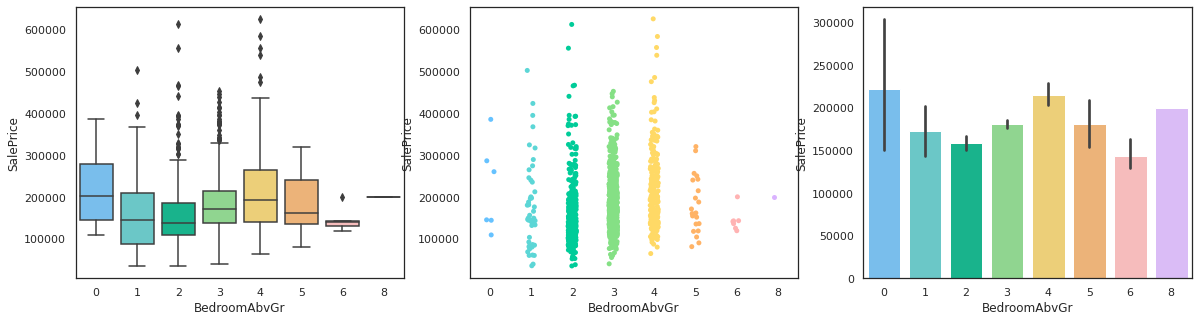

- We see a lot of houses with 2 3 and 4 bedrooms above ground, and a very low number of houses with 6 or above.
- Since this is a continuous numeric feature, I will leave it how it is.

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
       

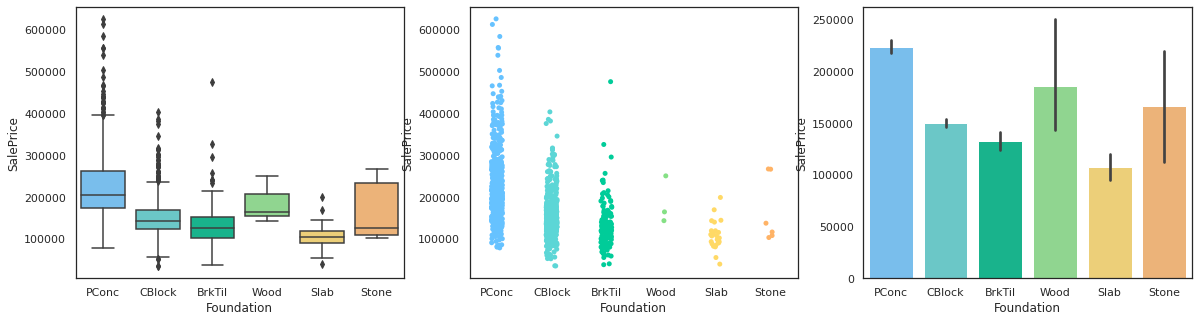

- We have 3 classes with high frequency, however we have 3 of low frequency.
- Due to the large difference in median and mean SalePrice's across the 3 lower frequent classes, I am not going to cluster these together. 
- Also since this feature is not ordinal, labelling does not make sense. Instead I will create dummy variables.

***Condition1*** & ***Condition2***
- Proximity to various conditions.
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

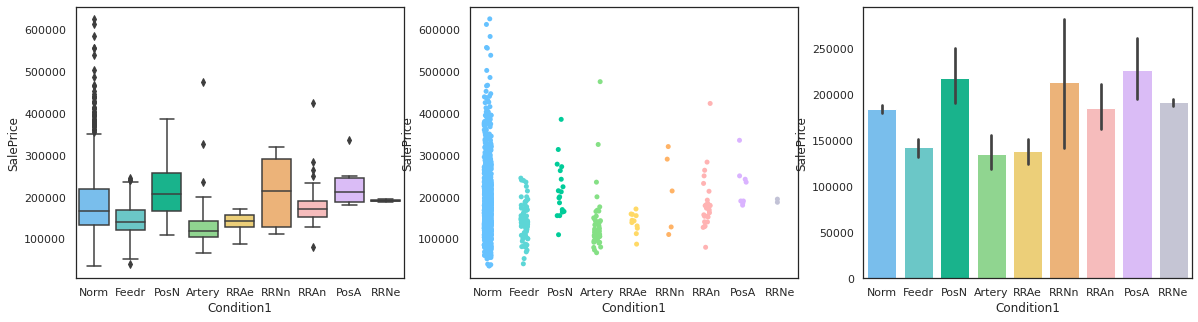

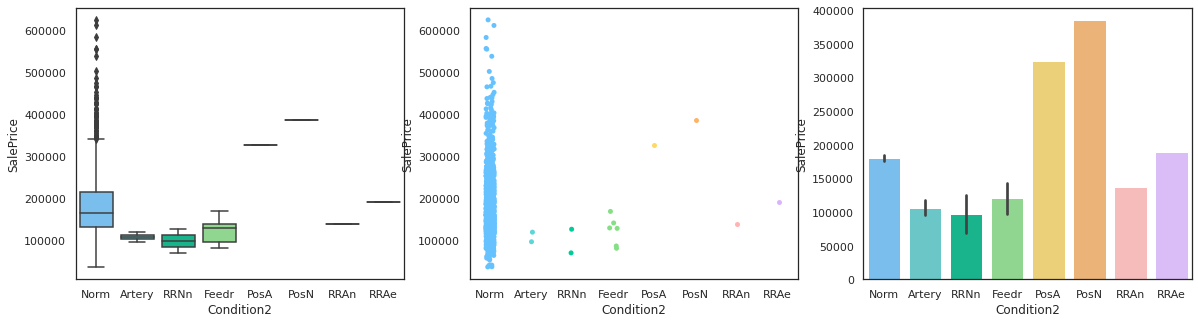

- Since this feature is based around local features, it is understandable that having more desirable things, like a parks... nearby are a factor that would contribute towards a higher SalePrice. 
- For this feature I am going to cluster the classes based on the class description. Then, I will create dummy features. 
- I will then drop "Condition2" after creating a flag to indicate whether a different condition from the first is nearby.

In [ ]:
all_data['Condition1'] = all_data['Condition1'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})
all_data['Condition2'] = all_data['Condition2'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})

In [ ]:
def ConditionMatch(col):
    if col['Condition1'] == col['Condition2']:
        return 0
    else:
        return 1
    
all_data['Diff2ndCondition_Flag'] = all_data.apply(ConditionMatch, axis=1)
all_data.drop('Condition2', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["Condition1"], prefix="Condition1")
all_data.head(3)

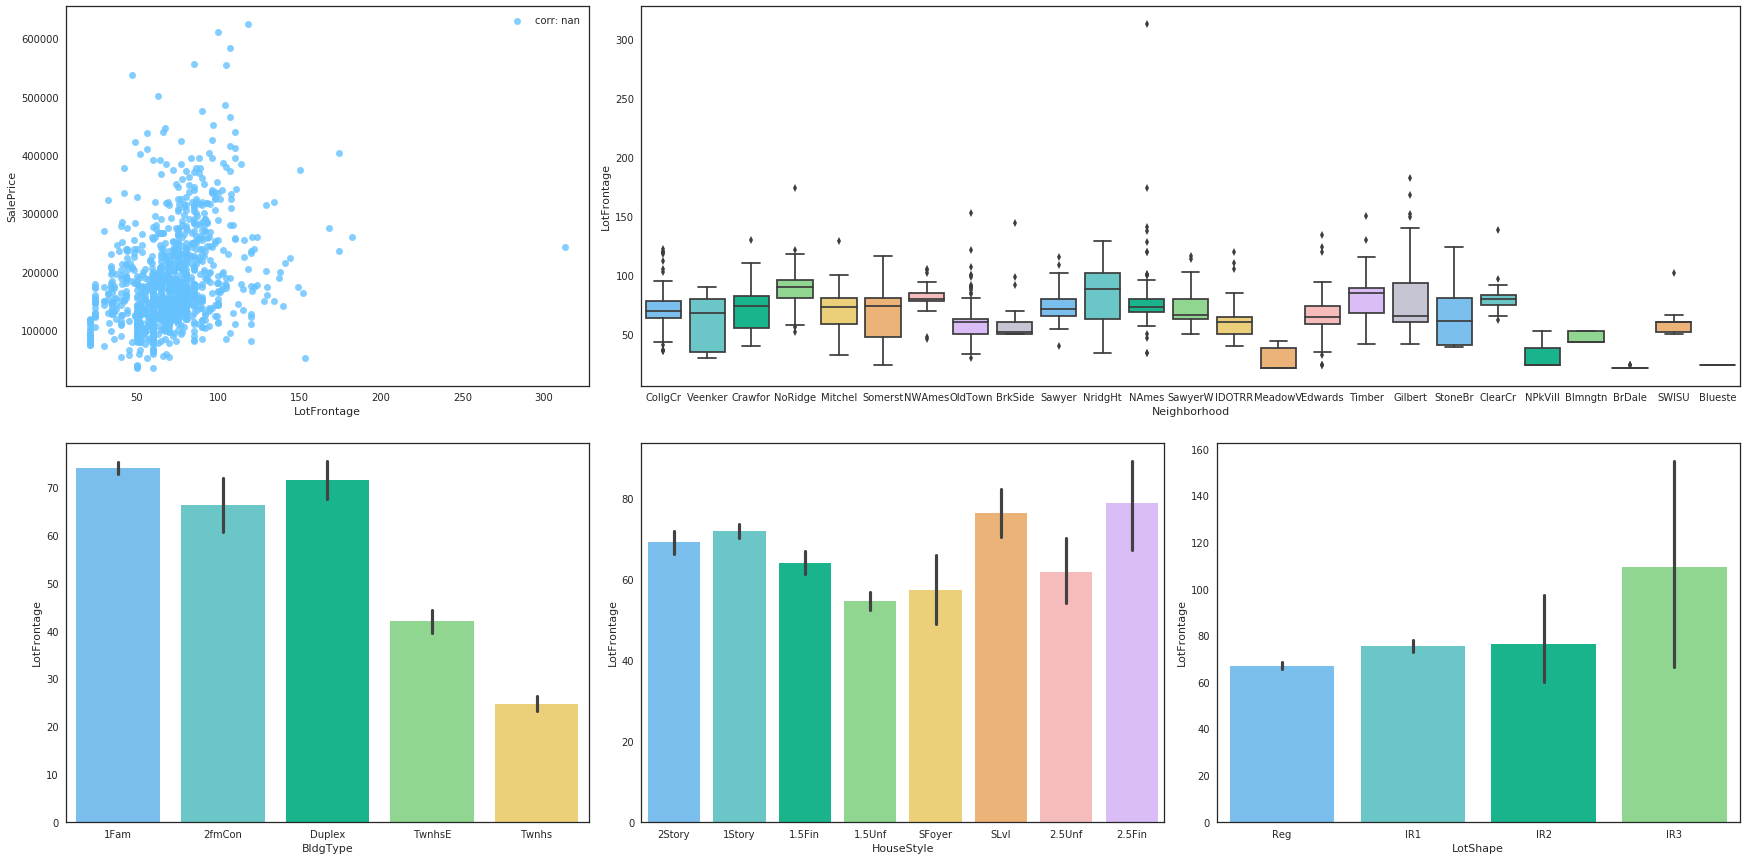

panda qcut

why boxcox transformation lambda value of 0.15